# ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение".

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [60]:
# Импортируем модуль json
import json 
# Импортируем функцию pprint()
from pprint import pprint 
# Импортируем модуль pandas
import pandas as pd 
# Открываем файл и связываем его с объектом "f"
with open('data/recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


✍️ Попробуйте! В результате мы действительно получаем DataFrame.

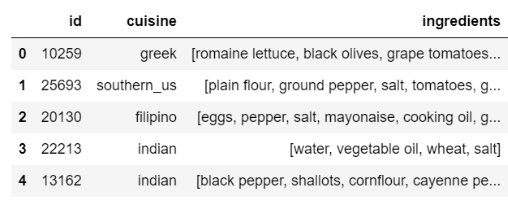

### ДОПОЛНИТЕЛЬНО

Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

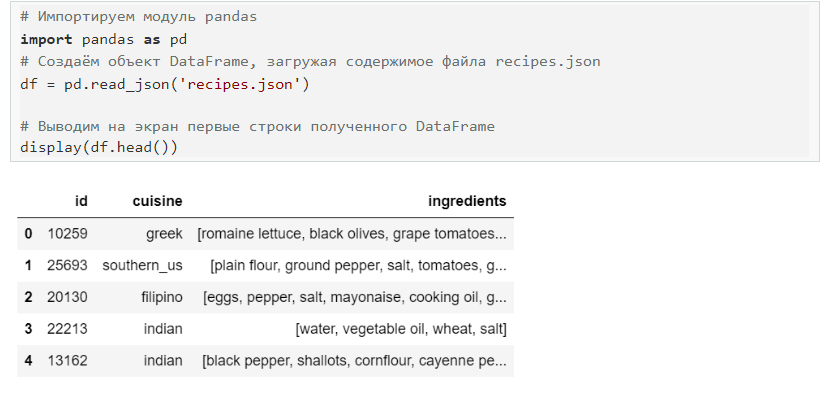

Для более подробного ознакомления с функцией  read_json() предлагаем вам обратиться к [документации](https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_json.html).

In [61]:
# Импортируем модуль pandas
import pandas as pd 
# Создаём объект DataFrame, загружая содержимое файла recipes.json
df = pd.read_json('data/recipes.json') 

# Выводим на экран первые строки полученного DataFrame
display(df.head())


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Задание 6.1

Сколько столбцов содержит получившийся DataFrame?


In [62]:
display(df.shape[1])

3

### Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

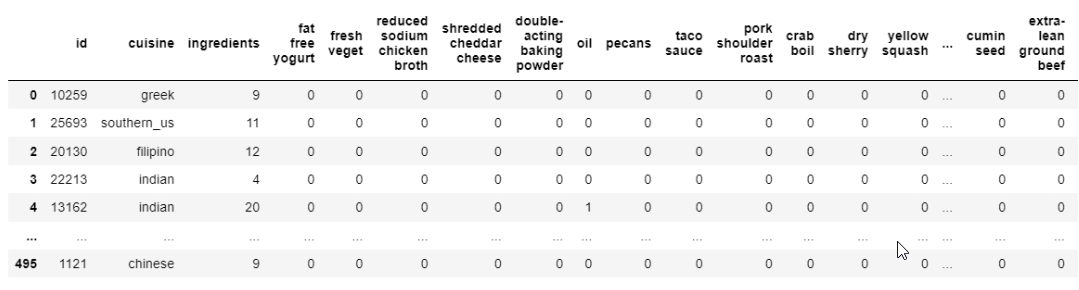

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2. Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

### Задание 6.4
Создайте реестр уникальных ингредиентов all_ingredients, который будет использоваться на втором этапе. Какое количество уникальных ингредиентов в нашем DataFrame?

In [1]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas

with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
    
all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов, входящих в состав текущего блюда
        all_ingredients.add(ingredient) # Добавляем уникальный ингредиент в реестр
display(len(all_ingredients)) # Выводим на экран количесвто уникальных ингредиентов из реестра

1318

→ Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [64]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list):
    # Если ингредиент есть в текущем блюде,
    if ingredient_name in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0

# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(len) 
# Выводим содержимое полученного DataFrame на экран
display(df)

C:\Users\User\AppData\Local\Temp\ipykernel_10436\1365188019.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\User\AppData\Local\Temp\ipykernel_10436\1365188019.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\User\AppData\Local\Temp\ipykernel_10436\1365188019.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

,id,cuisine,ingredients,sage leaves,carbonated beverages,chipotles in adobo,kasuri methi,steamed rice,great northern beans,coleslaw,...,orange,crema mexicana,reduced sodium tamari,saffron threads,margarita mix,pickled carrots,medium eggs,almond flour,unsweetened coconut milk,strong white bread flour
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Задание 6.5 (External resource)

Напишите код для создания списка ids всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок id должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл recipes.csv.

In [65]:
ids = list(df['id'].unique())
print(ids)

[np.int64(10259), np.int64(25693), np.int64(20130), np.int64(22213), np.int64(13162), np.int64(6602), np.int64(42779), np.int64(3735), np.int64(16903), np.int64(12734), np.int64(5875), np.int64(45887), np.int64(2698), np.int64(41995), np.int64(31908), np.int64(24717), np.int64(34466), np.int64(1420), np.int64(2941), np.int64(8152), np.int64(13121), np.int64(40523), np.int64(40989), np.int64(29630), np.int64(49136), np.int64(26705), np.int64(27976), np.int64(22087), np.int64(9197), np.int64(1299), np.int64(40429), np.int64(34419), np.int64(10276), np.int64(33465), np.int64(39250), np.int64(37963), np.int64(20051), np.int64(11300), np.int64(17610), np.int64(37405), np.int64(28302), np.int64(31634), np.int64(32304), np.int64(36341), np.int64(29369), np.int64(27564), np.int64(18515), np.int64(3335), np.int64(4499), np.int64(4906), np.int64(5767), np.int64(30748), np.int64(35930), np.int64(44902), np.int64(31119), np.int64(3535), np.int64(47028), np.int64(38112), np.int64(2646), np.int64(52

# СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [66]:
df.to_csv('recipes.csv', index = False)